<a href="https://colab.research.google.com/github/philipp-lampert/mymandible/blob/main/data_science/02_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration and visualization
This notebook explores and visualizes the mymandible dataset.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Explanations in this notebook always refer to the code below.
Let's first import the processed dataframe from GitHub.

In [2]:
df = pd.read_parquet('https://github.com/philipp-lampert/mymandible/blob/main/data_science/data/processed_data.parquet?raw=true')

We will start by creating some graphs to get a sense of what our patient collective looks like.

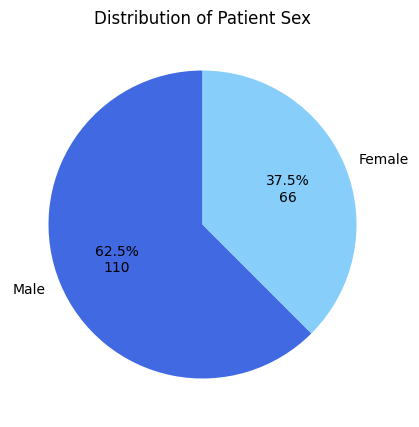

In [3]:
female_count = df['sex_female'].sum()
male_count = len(df) - female_count

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['royalblue', 'lightskyblue']
total_count = sum(sizes)

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'{p:.1f}%\n{int(total_count * p / 100)}', startangle=90)
plt.title('Distribution of Patient Sex')
plt.show()

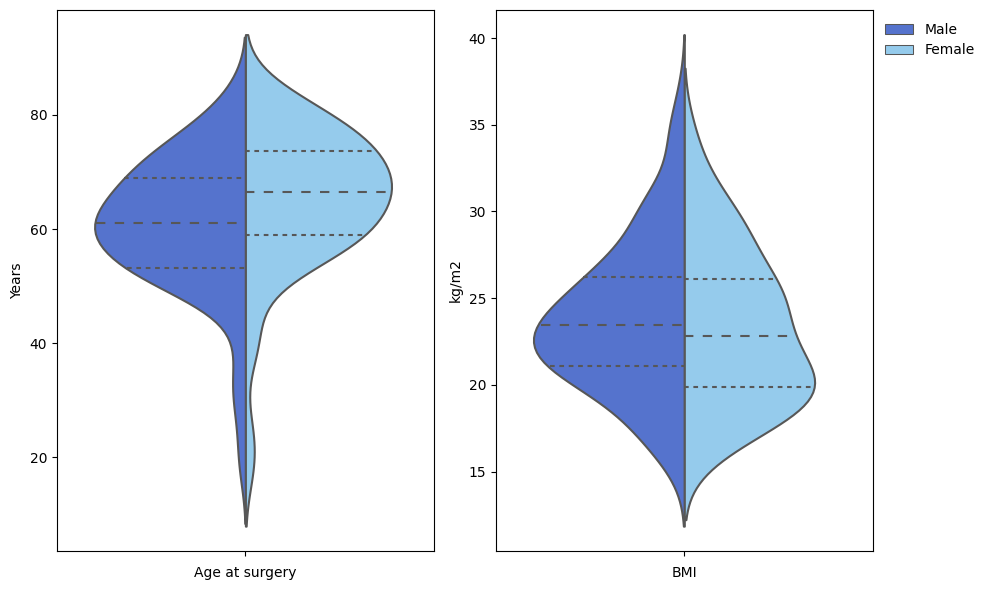

In [4]:
df['all'] = ''

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

bw = 0.4

sns.violinplot(x=df['all'], y=df['age_surgery_years'].astype('int'), palette=colors, hue=df['sex_female'], split = True, bw=bw, inner='quart')
plt.legend([], frameon=False)

plt.xlabel('Age at surgery')
plt.ylabel('Years')
plt.title('')

plt.subplot(1, 2, 2)
ax = sns.violinplot(x=df['all'], y=df['bmi'].astype('float'), hue=df['sex_female'], palette=colors, split=True, bw=bw, inner='quart')

handles, labels = ax.get_legend_handles_labels()
labels = ["Male", "Female"]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

plt.xlabel('BMI')
plt.ylabel('kg/m2')
plt.title('')
plt.tight_layout()
plt.show()

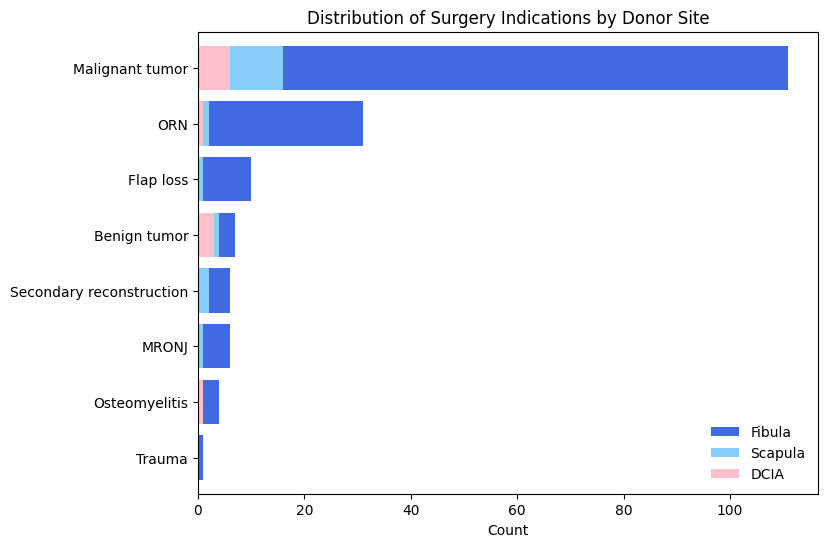

In [5]:
colors = ['pink', 'lightskyblue', 'royalblue']

indication_by_donor_site = df.groupby('indication')['flap_donor_site'].value_counts().unstack()
indication_by_donor_site['total'] = indication_by_donor_site.sum(axis=1)
indication_by_donor_site = indication_by_donor_site.sort_values(by='total', ascending=True).drop('total', axis=1)

flap_donor_site_order = ['pelvis', 'scapula', 'fibula']
indication_by_donor_site = indication_by_donor_site[flap_donor_site_order]

labels = {
    'malignant_tumor': 'Malignant tumor',
    'benign_tumor': 'Benign tumor',
    'osteoradionecrosis': 'ORN',
    'secondary_reconstruction': 'Secondary reconstruction',
    'flap_loss': 'Flap loss',
    'medication_related_osteonecrosis': 'MRONJ',
    'osteomyelitis': 'Osteomyelitis',
    'trauma': 'Trauma'
}

indication_by_donor_site.index = indication_by_donor_site.index.to_series().replace(labels)

ax = indication_by_donor_site.plot(kind='barh', stacked=True, figsize=(8, 6), color=colors, width=0.8)

handles, labels = ax.get_legend_handles_labels()
labels = ["DCIA", "Scapula", "Fibula"]
order = [2, 1, 0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right", frameon=False)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Distribution of Surgery Indications by Donor Site')
plt.show()


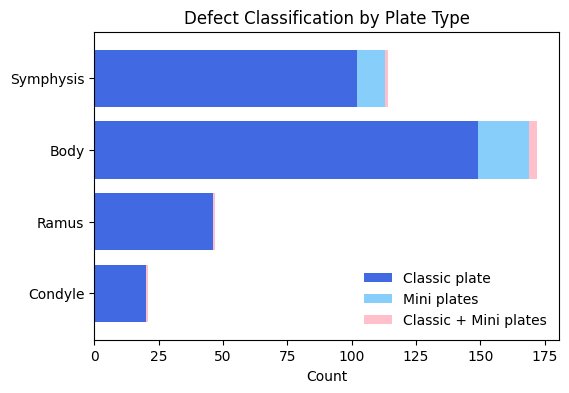

In [6]:
labels = {
    'cad_long': 'Classic plate',
    'cad_mini': 'Mini plates',
    'cad_mix': 'Classic + Mini plates'
}

df['plate_type'] = df['plate_type'].map(labels)

defect_classification = [col for col in df.columns if col.startswith("urkens_classification___")]
defect_by_plate = df.groupby('plate_type')[defect_classification].sum()

defect_by_plate = defect_by_plate[defect_by_plate.sum().index].T

labels = {
    'urkens_classification___c': 'Condyle',
    'urkens_classification___r': 'Ramus',
    'urkens_classification___b': 'Body',
    'urkens_classification___s': 'Symphysis'
}

defect_by_plate.index = defect_by_plate.index.to_series().replace(labels)

# Create a stacked bar chart
ax = defect_by_plate.plot(kind='barh', stacked=True, figsize=(6, 4), color=['royalblue', 'lightskyblue', 'pink'], width=0.8)

# Create a bar chart
plt.title("Defect Classification by Plate Type")
plt.xlabel('Count')
plt.ylabel('')
plt.legend(title='', frameon=False, loc='lower right')

plt.show()

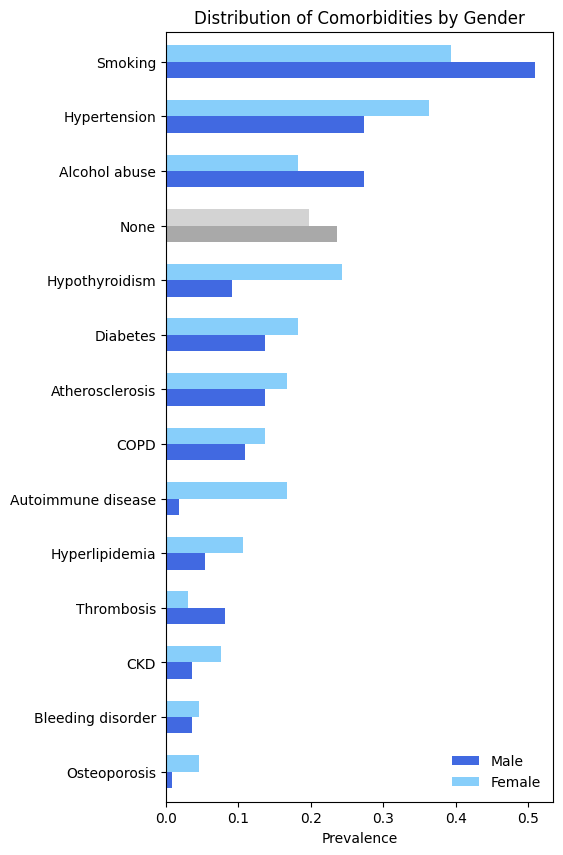

In [7]:
comorbidity_columns = [column for column in df.columns if column.startswith("comorbidity___")]
comorbidity_by_gender = df.groupby('sex_female')[comorbidity_columns].mean()

comorbidity_by_gender = comorbidity_by_gender[comorbidity_by_gender.sum().sort_values(ascending=True).index].T

comorbidity_labels = {
    'comorbidity___smoking': 'Smoking',
    'comorbidity___hypertension': 'Hypertension',
    'comorbidity___none': 'None',
    'comorbidity___alcohol': 'Alcohol abuse',
    'comorbidity___diabetes': 'Diabetes',
    'comorbidity___hypothyroidism': 'Hypothyroidism',
    'comorbidity___copd': 'COPD',
    'comorbidity___atherosclerosis': 'Atherosclerosis',
    'comorbidity___hyperlipidemia': 'Hyperlipidemia',
    'comorbidity___autoimmune_disease': 'Autoimmune disease',
    'comorbidity___osteoporosis': 'Osteoporosis',
    'comorbidity___thrombosis': 'Thrombosis',
    'comorbidity___chronic_kidney_disease': 'CKD',
    'comorbidity___bleeding_disorder': 'Bleeding disorder'
}

comorbidity_by_gender = comorbidity_by_gender.rename(columns={True: 'Female', False: 'Male'})
comorbidity_by_gender.index = comorbidity_by_gender.index.map(comorbidity_labels)

def setcolors(ax, name="None", colors=['darkgrey', 'lightgrey']):
    ytl = ax.get_yticklabels()
    numlabels = len(ytl)

    for i, t in enumerate(ytl):
        if t.get_text() == name:
            break

    rects = ax.get_children()[0:2 * numlabels]
    nrects = [rects[i], rects[numlabels + i]]

    for rect, color in zip(nrects, colors):
        rect.set_color(color)
        rect.set_edgecolor("none")

bars = comorbidity_by_gender.plot(kind='barh', stacked=False, figsize=(5, 10), color=["royalblue", "lightskyblue"], width=0.6)
setcolors(bars)

plt.title('Distribution of Comorbidities by Gender')
plt.xlabel('Prevalence')
plt.ylabel('')
bars.legend(title='', loc="lower right", frameon=False)
plt.show()

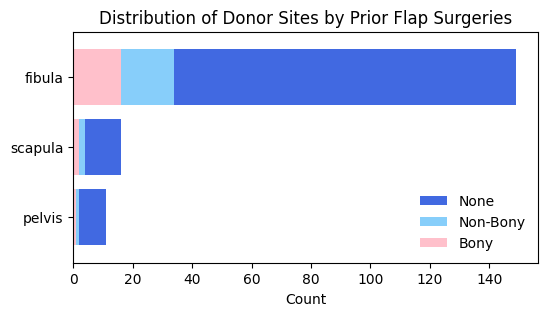

In [8]:
colors = ['pink', 'lightskyblue', 'royalblue']

donor_site_by_prior_flap = df.groupby('flap_donor_site')['prior_flap'].value_counts().unstack()
donor_site_by_prior_flap['total'] = donor_site_by_prior_flap.sum(axis=1)
donor_site_by_prior_flap = donor_site_by_prior_flap.sort_values(by='total', ascending=True).drop('total', axis=1)

ax = donor_site_by_prior_flap.plot(kind='barh', stacked=True, figsize=(6, 3), color=colors, width=0.8)

handles, labels = ax.get_legend_handles_labels()
labels = ['Bony', 'Non-Bony', 'None']
order = [2, 1, 0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right", frameon=False)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Distribution of Donor Sites by Prior Flap Surgeries')
plt.show()


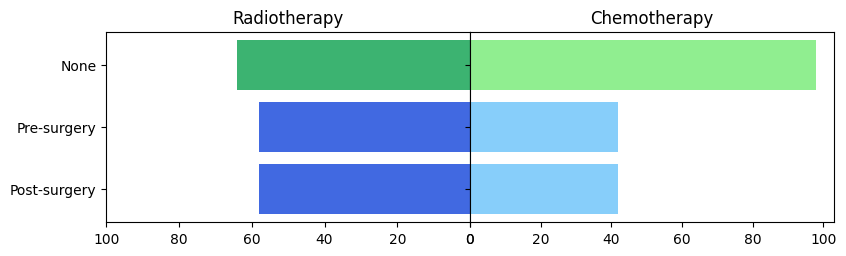

In [9]:
# Calculate counts for radiotherapy columns
radiotherapy = {}

for column in df.columns:
    if "radiotherapy___" in column:
        radiotherapy_option = column.replace('radiotherapy___', '')
        radiotherapy[radiotherapy_option] = df[column].sum()

chemotherapy = {}

for column in df.columns:
    if "chemotherapy___" in column:
        chemotherapy_option = column.replace('chemotherapy___', '')
        chemotherapy[chemotherapy_option] = df[column].sum()


data = {
    'radiotherapy': list(radiotherapy.values()),
    'chemotherapy': list(chemotherapy.values())
}

labels = {
    'none': 'None',
    'pre_surgery': 'Pre-surgery',
    'post_surgery': 'Post-surgery'
}

index = [labels[key] for key in radiotherapy.keys()]

data = pd.DataFrame(data, index=index)

fig, ax = plt.subplots(figsize=(8, 2.5), ncols=2, sharey=True)
fig.tight_layout()

# Plot the bidirectional bar plot for radiotherapy
ax[0].barh(index, data['radiotherapy'], color=['mediumseagreen', 'royalblue', 'royalblue'], align='center')
ax[0].set_title('Radiotherapy')

# Plot the bidirectional bar plot for chemotherapy
ax[1].barh(index, data['chemotherapy'], color=['lightgreen', 'lightskyblue', 'lightskyblue'], align='center')
ax[1].set_title('Chemotherapy')

ax[0].invert_xaxis()
ax[0].invert_yaxis()

ax[0].set(yticks=data.index, yticklabels=data.index)
ax[0].yaxis.tick_left()
ax[0].tick_params(axis='y')
ax[0].set_xticks([0, 20, 40, 60, 80, 100])
plt.subplots_adjust(wspace=0)

plt.show()

In [10]:
# Plot for plate type and plate thickness

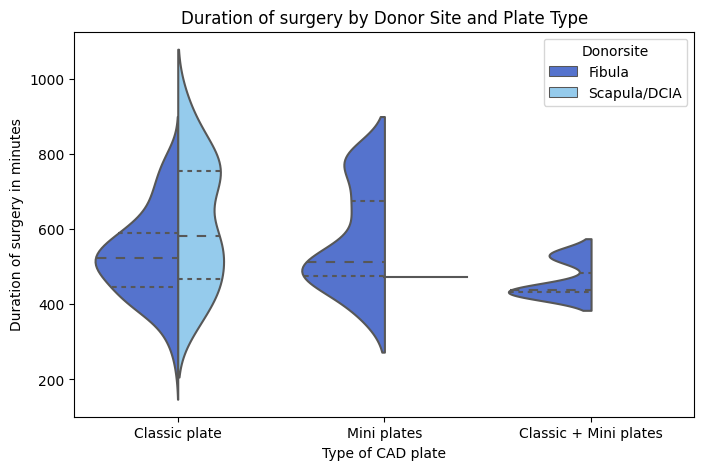

In [11]:
plt.figure(figsize=(8, 5))

colors = ['royalblue', 'lightskyblue']

bw = 0.4

df['no_fibula'] = np.where(df['flap_donor_site'] != 'fibula', True, False)

ax = sns.violinplot(x=df['plate_type'], y=df['surgery_duration_min'].astype('int'), hue=df['no_fibula'], split=True, palette=colors, bw=bw, inner='quart')

handles, labels = ax.get_legend_handles_labels()
labels = ["Fibula", "Scapula/DCIA"]
ax.legend(handles, labels, title = 'Donorsite')

plt.xlabel('Type of CAD plate')
plt.ylabel('Duration of surgery in minutes')
plt.title('Duration of surgery by Donor Site and Plate Type')

plt.show()

In [12]:
df.columns.values

array(['sex_female', 'indication', 'comorbidity___none',
       'comorbidity___smoking', 'comorbidity___alcohol',
       'comorbidity___copd', 'comorbidity___hypertension',
       'comorbidity___diabetes', 'comorbidity___atherosclerosis',
       'comorbidity___hyperlipidemia', 'comorbidity___osteoporosis',
       'comorbidity___hypothyroidism',
       'comorbidity___chronic_kidney_disease', 'comorbidity___thrombosis',
       'comorbidity___bleeding_disorder',
       'comorbidity___autoimmune_disease', 'which_autoimmune_disease',
       'which_bleeding_disorder', 'prior_flap', 'age_surgery_years',
       'flap_donor_site', 'flap_revision', 'days_to_flap_revision',
       'radiotherapy___none', 'radiotherapy___pre_surgery',
       'radiotherapy___post_surgery', 'chemotherapy___none',
       'chemotherapy___pre_surgery', 'chemotherapy___post_surgery',
       'plate_type', 'long_plate_thickness', 'mini_plate_thickness',
       'urkens_classification___c', 'urkens_classification___r',
     